<a href="https://colab.research.google.com/github/argennof/IAA/blob/main/Rta_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

# **Introducción al Aprendizaje Automático**

## Entregable # 1 

## GRUPO Nº24

## INTEGRANTES:
   - Clarisa Manzone
   - Nico Rosales
   - Daniel Rubio
   - Diana Fonnegra   
   ------


# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [ ]:
# En primer lugar vamos a importar algunas de las librerías que vamos a utilizar:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (8.5,8.5)})

import warnings
warnings.filterwarnings('ignore')


from sklearn import datasets, linear_model


## Carga del Conjunto de Datos

* Cargamos el conjunto de datos y vemos su contenido.

In [ ]:
# Importamos el conjunto de datos desde la librería de scikit-learn
from sklearn.datasets import load_boston
boston = load_boston()

# Exploramos la información contenida en el dataset:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
# Mostramos las características del dataset
print('Características del dataset:')
print(boston.DESCR)

Características del dataset:
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 

In [ ]:
# print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
print('Nombres columnas:')
boston['feature_names']  # nombres de los atributos para cada columna de 'data'

Nombres columnas:


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
#Podemos verificar la cantidad de datos que hay en los dataset
print('Cantidad de datos:')
boston['data'].shape, boston['target'].shape

Cantidad de datos:


((506, 13), (506,))

In [ ]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [ ]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape


((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
----

- Rta// Se trata de un conjunto de datos **"Boston house prices"**, que representa el costo de las viviendas de Boston dado un número de habitaciones. Presenta caracteristicas como: 506 registros, 13 variables entre numéricas/categóricas y un valor de Mediana (atributo 14 - denominado: target). A su vez este conjunto de datos no presenta valores faltantes.

Como caracteristicas generales el conjunto es de tipo diccionario, permitiendo acceder mediante claves especificas a:
* La descripcion del dataset.
* Los atributos o features relevados para cada muestra.
* El valor de la propiedad correspondiente a cada muetra.
* Otros datos complementarios del dataset.

Nota 1: En la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html), se presenta una advertencia que indica:
   - El conjunto de datos sobre los precios de la vivienda en Boston tiene un problema ético: los autores de este conjunto de datos diseñaron una variable "B", la cual supone que la autosegregación racial tenía un impacto positivo en los precios de la vivienda.
    A su vez argumentan que: *el objetivo de la investigación que condujo a la creación de este conjunto de datos era estudiar el impacto de la calidad del aire, pero no se demostró adecuadamente la validez de esta suposición*.
   - Por lo tanto, desaconsejan el uso de este conjunto de datos a menos que el propósito del código sea estudiar y educar sobre cuestiones éticas en la ciencia de datos y el aprendizaje automático.

----

¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
- Rta// 
- La variable objetivo es un valor de Mediana (atributo 14 - denominado: target), expresado en unidades de $1000 de dólares.

- A su vez, como significado tendremos una estimación del **precio** poblacional medio **de una casa** en Boston **ocupadas por sus dueños**. Se estimula el modelo con nuevas features que respeten la distribucion de las utilizadas para el correspondiente cálculo. En definitiva asumiendo que la muestra es representativa de la problación.

----
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
- Rta// Las variables disponibles son:
        - CRIM: tasa per cápita de crimen para la ciudad.
        - ZN: proporción de terrenos residenciales con zonificación para lotes de más de 25.000 pies cuadrados.
        - INDUS: proporción de acres comerciales no minoristas por ciudad.
        - CHAS: Charles River dummy variable (= 1 si el tramo linda con el río; 0 en caso contrario).
        - NOX: concentración de óxidos nítricos (partes por 10 millones).
        - RM: número medio de habitaciones por vivienda.
        - AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
        - DIS: distancias ponderadas a cinco centros de empleo de Boston.
        - RAD: índice de accesibilidad a las autopistas radiales.
        - TAX: tasa de impuesto sobre la propiedad de valor total por 10.000 dólares.
        - PTRATIO: tasa alumno-profesor por ciudad.
        -  B -> 1000(Bk - 0.63)^2: donde Bk es la proporción de población negra por ciudad.
        - LSTAT: porcentaje de población de menor estatus.
        - MEDV: valor medio de las viviendas ocupadas por sus propietarios en miles de dólares.

---
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
- Rta// Las posibles variables determinantes son:

Estrato social:
* CRIM: tasa de criminalidad per cápita por ciudad
* LSTAT: % estado inferior de la población
* PTRATIO: ratio alumno-profesor por municipio
* B: 1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad

Localización:
* DIS: Distancias ponderadas  a cinco centros de empleo de Boston
* RAD: Índice de accesibilidad a carreteras radiales
* CHAS: Variable ficticia Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)
    
Caracteristica de la vivienda:
* RM: promedio de cuartos por vivienda
* AGE: proporción de unidades ocupadas por propietarios construidas antes de 1940
* TAX: Tasa de impuesto a la propiedad de valor total por cada $10,000

---
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.      

- Rta// Dentro de los posibles sesgos de información se encuentran: 
  -  B -> 1000(Bk - 0.63)^2:  la proporción de población negra por ciudad. A su vez, LSTAT : el porcentaje de población con “menor estatus”.
Ya que induce a la idea que esta población pueda ser peligrosa o significativa a la hora de escoger una vivienda o el valor del mismo. 



---
## Ejercicio 2: [Visualización de los Datos](https://chrispfchung.github.io/model%20data/boston-housing-data/)

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
- Rta//: 
    - Para la visualización de las variables, construimos inicialmente un data frame e identificamos el valor a estimar (target - MEDV).
    - Luego para obtener las relaciones entre las variables iteramos sobre el número de columnas y usamos el modulo `scatter`. Finalmente, generamos los gráficos.


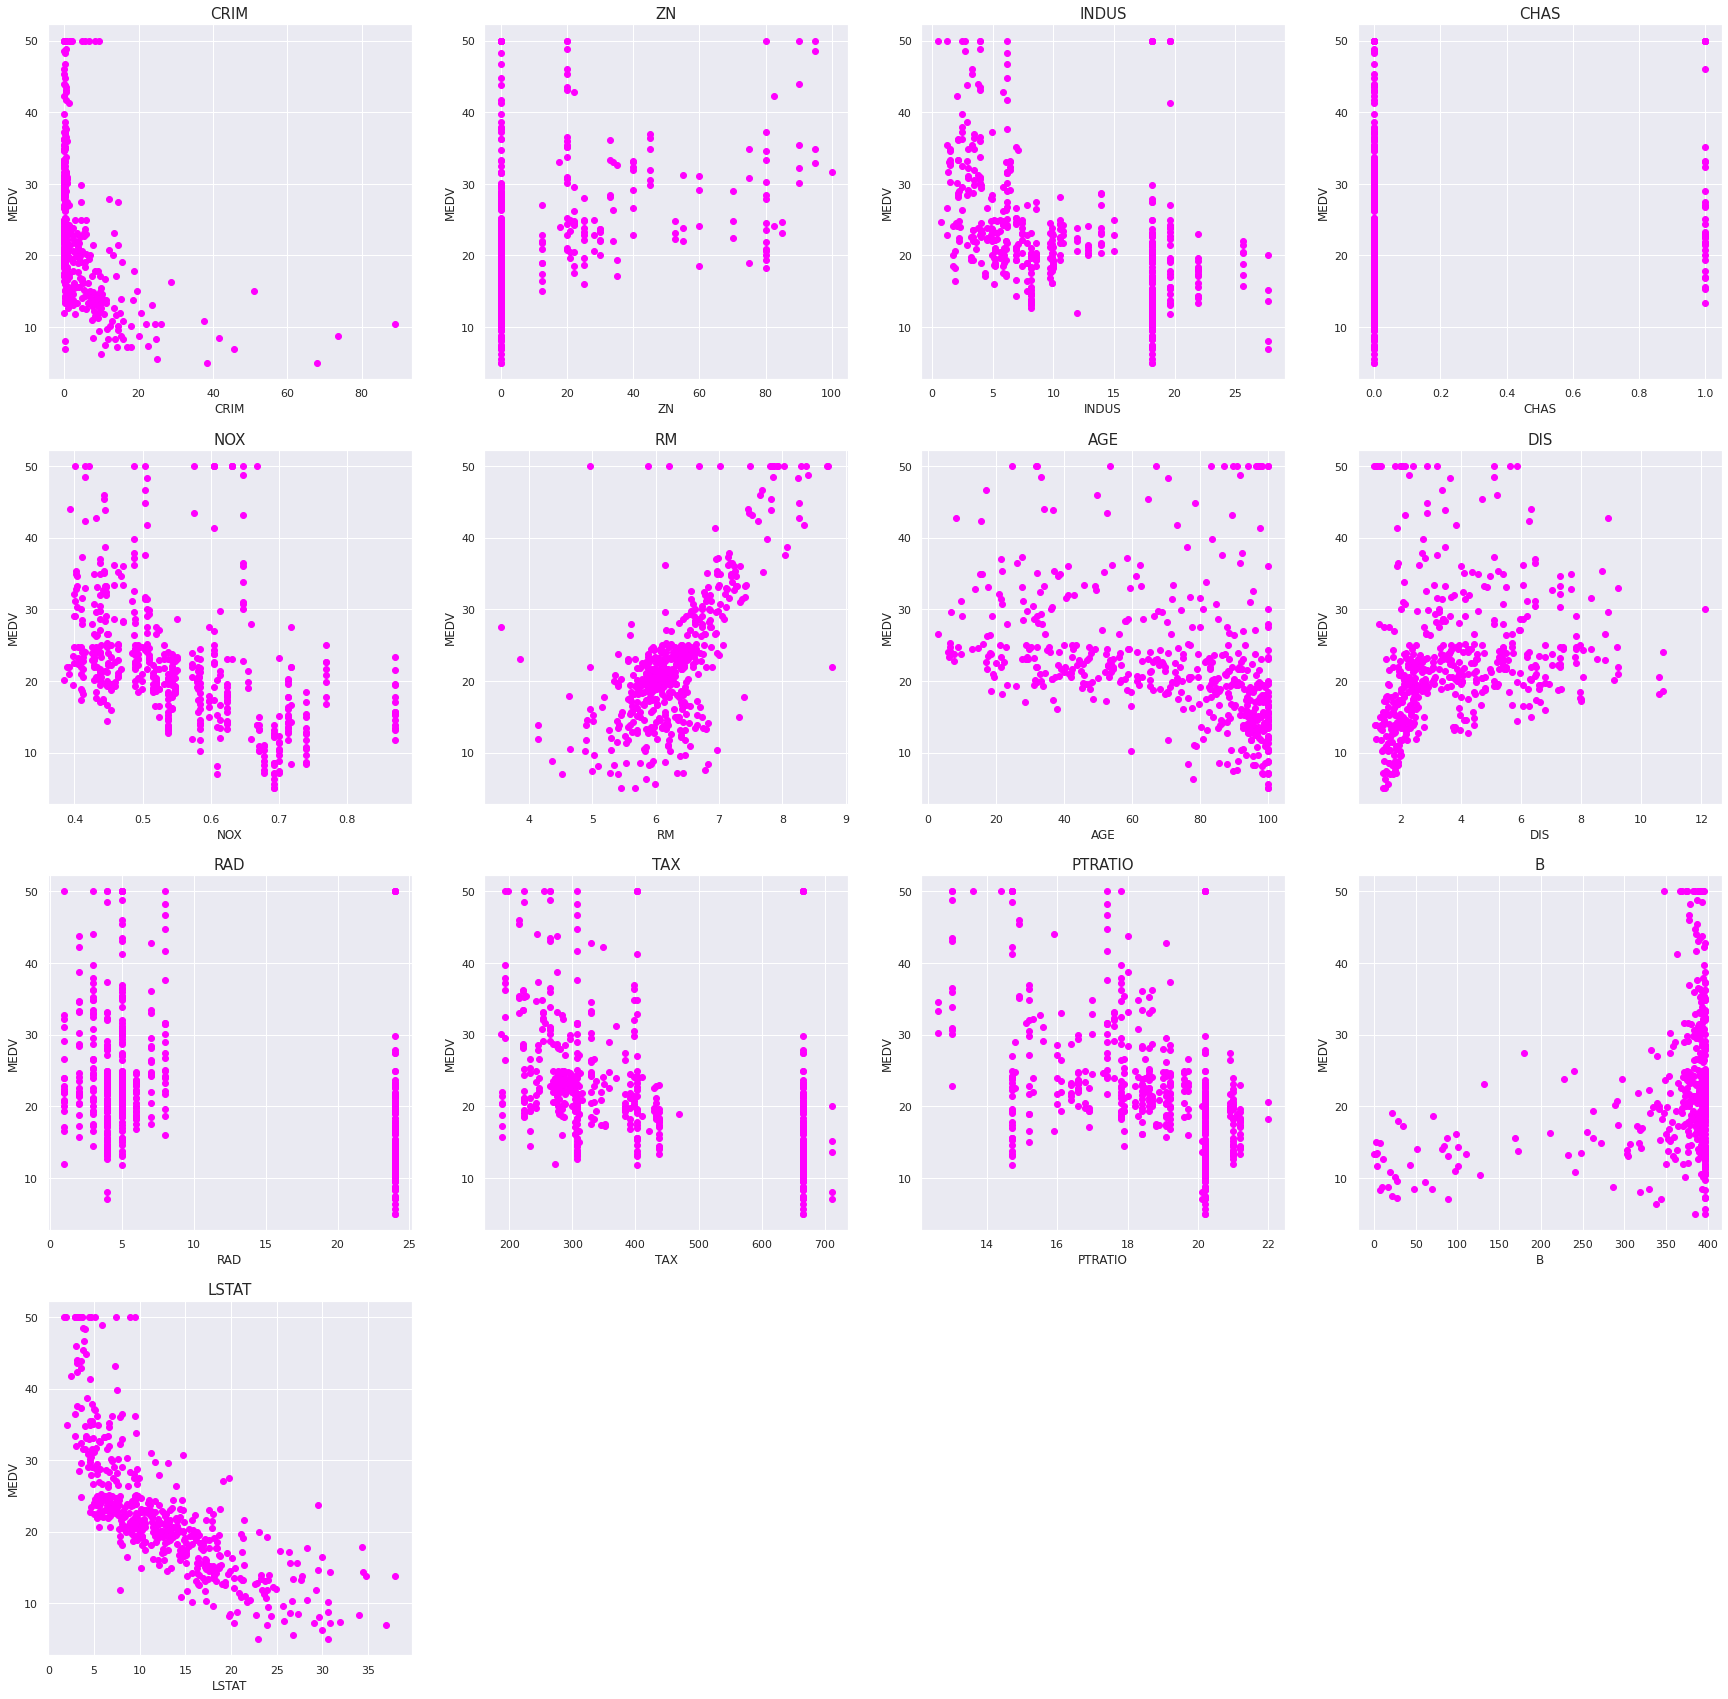

In [ ]:
# Visualización 

features = df.columns
target = boston['target']
plt.figure(figsize=(30,30))
for index, feature_name in enumerate(features):
    # 4 rows of plots, 13/2 == 4 plots per row, index+1 where the plot begins
    plt.subplot(4,len(features)/3, index+1)
    plt.scatter(df[feature_name], target, color='magenta')
    plt.title(feature_name, fontsize=15)
    plt.xlabel(feature_name, fontsize=12)
    plt.ylabel('MEDV', fontsize=12)

---
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
- Rta//: las variables que parecen estar relacionadas, mostrando una tendencia:
    - Lstat vs MEDV
    - RM vs MEDV
    - NOX vs MEDV


---
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.
- Rta//:
Los valores a los que consideramos más relevantes serían:
1. Número medio de habitaciones por vivienda (RM).
2. Tasa de impuesto sobre la propiedad de valor total (TAX).
3. Tasa per cápita de crimen para la ciudad (CRIM).
4. Concentración de óxidos nítricos (NOX).
5. Índice de accesibilidad a las autopistas (RAD).
6. Proporción de acres comerciales no minoristas por ciudad (INDUS).
---

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
 - Rta//:


In [ ]:
# 1. Considerando la variable número de habitaciones:
# Seleccionamos al atributo 'RM' como nuestra variable independiente 
# y el objetivo como nuestra variable dependiente
# Para ello definimos:
X_RM, y = boston.data[:, np.newaxis, 5], boston['target']


2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
 - Rta//:


In [ ]:
# 2. Instanciando y entrenando el modelo:

from sklearn.model_selection import train_test_split

# dividimos el conjunto de datos:
x_train, x_test, y_train, y_test = train_test_split(X_RM, y, train_size=0.8, random_state=0) # test_size=0.2


print('--- --- --- --- --- --- --- --- --- --- --- ---')
print(f'x_train.shape, x_test.shape: {x_train.shape, x_test.shape}')
print('--- --- --- --- --- --- --- --- --- --- --- ---')

#Instanciamos el algoritmo de regresión lineal a utilizar
lr = linear_model.LinearRegression()
#Entreno el modelo
lr.fit(x_train, y_train)

--- --- --- --- --- --- --- --- --- --- --- ---
x_train.shape, x_test.shape: ((404, 1), (102, 1))
--- --- --- --- --- --- --- --- --- --- --- ---


LinearRegression()

3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
- Rta//:


In [ ]:
# 3. Realizo una predicción utilizando el modelo entrenado
from sklearn.metrics import mean_squared_error
# evaluacion sobre el conjunto de entrenamiento
y_train_predict = lr.predict(x_train)

# evaluacion sobre el conjunto de testeo
y_test_predict = lr.predict(x_test)

In [ ]:
# Exploramos las predicciones realizadas por el modelo:
y_test_predict

array([22.90445223, 21.80741526, 23.2795076 , 13.67809006, 21.95743741,
       18.22563646, 18.89135974, 19.48207195, 10.15256956, 23.5795519 ,
       19.37893173, 25.94240075, 22.9794633 ,  7.1427502 , 36.67836079,
       29.54293232, 22.05120126, 31.84952286, 24.90162209, 18.37565861,
       23.77645597, 18.65695014, 20.97291706, 24.30153349, 16.80042604,
       -0.25521702, 19.4539428 , 17.05358842, 39.1818554 , 20.64474361,
       21.51674735, 20.54160338, 21.90117911, 20.67287276, 23.68269213,
       17.93496854, 19.66022326, 18.61006821, 23.04509799, 21.30109051,
       20.97291706, 17.77557001, 21.13231559, 14.40944804, 24.84536378,
       23.72957405, 17.81307555, 20.99166983,  9.49622266, 26.59874765,
       21.20732667, 16.68790943, 19.60396495, 40.96336842, 17.50365486,
       18.74133759, 17.02545926, 18.82572505, 17.50365486, 19.40706088,
       18.69445567, 20.84164768, 28.98972565, 24.95788039, 17.09109396,
       24.99538593, 25.92364798, 23.31701314, 27.77079569, 18.76

4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.


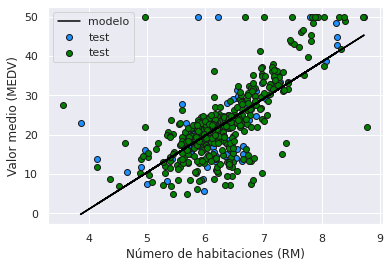

In [ ]:
#Graficamos los datos del dataset junto con el modelo

plt.scatter(x_test, y_test, facecolor="dodgerblue", edgecolor="k", label="test")
plt.scatter(x_train, y_train, color='green', edgecolor="k", label="test")
plt.plot(x_test, y_test_predict, color="black", linewidth=1.5, label="modelo")
plt.xlabel('Número de habitaciones (RM)')
plt.ylabel('Valor medio (MEDV)')
plt.legend()
plt.show()

5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

----

In [ ]:
# Obtenemos los coeficientes calculados por el modelo:
print('Datos Del Modelo de Regresión Lineal Simple')
print('--- --- --- --- --- --- --- --- --- --- --- ---')
print('Valor de la pendiente o coeficiente "a": ', lr.coef_)
print('Valor de la intersección o coeficiente "b": ', lr.intercept_)
print('--- --- --- --- --- --- --- --- --- --- --- --- \n')

# Analizamos la exactitud del modelo usando score:
print('Precisión del modelo entrenamiento (Train):')
print(round(lr.score(x_train, y_train),3))
print('--- --- --- --- --- --- --- --- --- --- --- --- \n')
print('Precisión del modelo prueba (Test):')
print(round(lr.score(x_test, y_test),3))


from sklearn.metrics import mean_squared_error
# RMSE
train_error = mean_squared_error(y_train, y_train_predict, squared=True)
val_error = mean_squared_error(y_test, y_test_predict, squared=True)

print('--- --- --- --- --- --- --- --- --- --- --- --- \n')

print('Root-Mean-Squared-Error (RMSE):')
print(f'Train error: {train_error:.3f}')
print(f'Test error: {val_error:.3f}')

print('--- --- --- --- --- --- --- --- --- --- --- --- \n')

print('Mean-Squared-Error (MSE):')
print(f'Train error - MSE: {mean_squared_error(y_train, y_train_predict, squared=False):.3f}')
print(f'Test error - MSE: {mean_squared_error(y_test, y_test_predict, squared=False):.3f}')



Datos Del Modelo de Regresión Lineal Simple
--- --- --- --- --- --- --- --- --- --- --- ---
Valor de la pendiente o coeficiente "a":  [9.37638431]
Valor de la intersección o coeficiente "b":  -36.476189627647315
--- --- --- --- --- --- --- --- --- --- --- --- 

Precisión del modelo entrenamiento (Train):
0.497
--- --- --- --- --- --- --- --- --- --- --- --- 

Precisión del modelo prueba (Test):
0.424
--- --- --- --- --- --- --- --- --- --- --- --- 

Root-Mean-Squared-Error (RMSE):
Train error: 42.820
Test error: 46.907
--- --- --- --- --- --- --- --- --- --- --- --- 

Mean-Squared-Error (MSE):
Train error - MSE: 6.544
Test error - MSE: 6.849


# Conclusiones:
- Del anterior podemos inferir que las metricas evaluadas se comportan mejor en el conjunto de entrenamiento, que en el conjunto de Test.

- En cuanto al gráfico podemos notar que en medida que aumentan los precios aumentan la cantidad en el número medio de habitaciones por vivienda. Con algunos puntos atípicos en valores de MEDV cercanos a 50.

- Con respecto al anterior podemos notar que el modelo en el entrenamiento presento un mejor desempeño -> 0.497, frente al modelo de prueba -> 0.424 para la métrica `score`. Este comportamiento lo vemos en ambos conjuntos al estimar el `RMSE`.

- También podemos inferir por el resultado del score: que el modelo no es el mejor para explicar el conjunto de datos. 

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

Rta//:

- Regresión Polinomial - Para diferentes grados de polinomio:

- Separamos los datos del dataset en entrenamiento (`Train`) - prueba (`Test`) para entrenar y probar el algoritmo:

In [ ]:
#Filtrado del atributo para el estudio
feature = 'RM'  # selecciono el atributo 'RM'
selector = (boston['feature_names'] == feature)
X_train_p = X_train[:, selector]
X_test_p = X_test[:, selector]
X_train_p.shape, X_test_p.shape


((404, 1), (102, 1))

Se estudian poliniomios hasta grado 9, instanciando y entrenando cada modelo. Se calculan los erroes imprimiendo y almancenando los mismos en una lista.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# train_errors = []
# test_errors = []
lista_errores=[]
for degree in range (1,21):
  
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_p, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_p)
    y_test_pred = model.predict(X_test_p)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_test, y_test_pred)

    print(f"º Pol={degree} -->", f'Train_err={train_error:.3f}',
          f'Test_err={val_error:.3f}')
    
    # Almacenando errores:
    # train_errors.append(train_error)
    # test_errors.append(val_error)
    lista_errores.append([degree, train_error,val_error ])

º Pol=1 --> Train_err=42.820 Test_err=46.907
º Pol=2 --> Train_err=37.746 Test_err=39.795
º Pol=3 --> Train_err=36.396 Test_err=39.826
º Pol=4 --> Train_err=34.808 Test_err=41.554
º Pol=5 --> Train_err=33.131 Test_err=41.038
º Pol=6 --> Train_err=33.130 Test_err=41.009
º Pol=7 --> Train_err=33.060 Test_err=42.394
º Pol=8 --> Train_err=33.060 Test_err=42.399
º Pol=9 --> Train_err=32.855 Test_err=46.039
º Pol=10 --> Train_err=32.800 Test_err=44.970
º Pol=11 --> Train_err=32.754 Test_err=43.752
º Pol=12 --> Train_err=32.718 Test_err=42.552
º Pol=13 --> Train_err=32.692 Test_err=41.467
º Pol=14 --> Train_err=32.676 Test_err=40.526
º Pol=15 --> Train_err=32.663 Test_err=39.821
º Pol=16 --> Train_err=32.652 Test_err=39.258
º Pol=17 --> Train_err=32.642 Test_err=38.843
º Pol=18 --> Train_err=32.635 Test_err=38.577
º Pol=19 --> Train_err=32.637 Test_err=38.467
º Pol=20 --> Train_err=33.637 Test_err=40.621


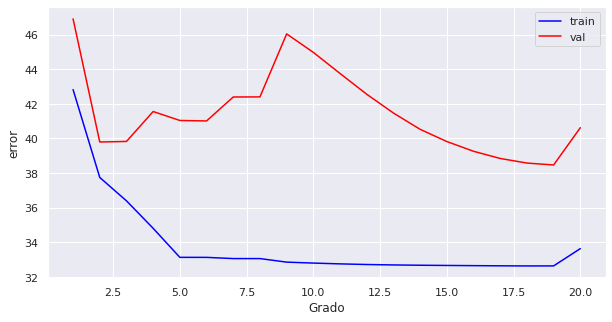

In [ ]:
lista_errores=np.array(lista_errores)
plt.figure(figsize=(10,5))
plt.plot(lista_errores[:,0], lista_errores[:,1], color="blue", label="train")
plt.plot(lista_errores[:,0], lista_errores[:,2], color="red", label="val")
plt.legend()
plt.xlabel("Grado")
plt.ylabel("error")
plt.title('Variación del Error con respecto al grado de error')
plt.show()

# Conclusiones: 
- Se puede notar que dada la selección del atributo `RM`, el error de entrenamiento es descendiente para ambas curvas hasta el grado 2. Además que error para entrenamiento decae hasta el grado 5 y una estabilizacion hasta aproximadamente el polinomio 18, mientras que en test pareciera ser mas inestable hasta el polinomio de grado 18. Luego del polinomio 18 ambas curvar presentan una tendencia a la alza.

- Se selecciona el grado 18 como propuesta de modelo que mejor desempeño ofrece. Se gráfica a continuación:

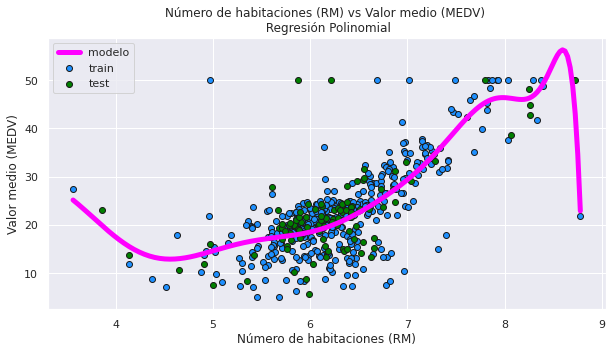

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
degree = 18
pf = PolynomialFeatures(degree)

#Instanciamos el algoritmo a utilizar
pr = linear_model.LinearRegression()
#Entrenamos el modelo
pr.fit(X_train_p, y_train)
lr = LinearRegression(fit_intercept=False)  
model = make_pipeline(pf, lr)
model.fit(X_train_p, y_train);

x_start = min(np.min(X_train_p), np.min(X_test_p))
x_end = max(np.max(X_train_p), np.max(X_test_p))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.figure(figsize=(10,5))
plt.plot(x, model.predict(x), color="magenta", label="modelo", linewidth=5)
plt.scatter(X_train_p, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_p, y_test, facecolor="green", edgecolor="k", label="test")
plt.xlabel('Número de habitaciones (RM)')
plt.ylabel('Valor medio (MEDV)')
plt.title('Número de habitaciones (RM) vs Valor medio (MEDV) \n Regresión Polinomial')
plt.legend()
plt.show()

# Conclusiones:
- El modelo que se selecciono y se adapto de manera adecuada a la distribución de los datos tanto para los puntos de entrenamiento y prueba, fué el polinomio de grado 18.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.

Rta//:

- Regresión Polinomial - Para diferentes grados de polinomio:
    - Elegimos los atributos RM, AGE y LSTAT.

In [ ]:
selector = (boston['feature_names'] == 'CRIM') | (boston['feature_names'] == 'AGE') | \
                                                            (boston['feature_names'] == 'LSTAT')

2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.

Rta//:
- Realizamos el etrenamiento y evaluación del modelo para distintos grados.

In [ ]:
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 3), (102, 3))

In [ ]:
lista_errores=[]
for degree in range (1,11):
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
    model = make_pipeline(pf, lr)
    model.fit(X_train_fs, y_train);
    
    # Predicción y evaluación.
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # Calculo de errores
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_test, y_test_pred)
    print(f"º Pol={degree} -->", f'Train_err={round(train_error,2)}',
          f'Test_err={round(val_error,2)}')
    lista_errores.append([degree, train_error,val_error ])

º Pol=1 --> Train_err=35.73 Test_err=44.77
º Pol=2 --> Train_err=23.65 Test_err=33.85
º Pol=3 --> Train_err=21.17 Test_err=33.65
º Pol=4 --> Train_err=19.27 Test_err=43.38
º Pol=5 --> Train_err=18.56 Test_err=4008.46
º Pol=6 --> Train_err=17.26 Test_err=201901.29
º Pol=7 --> Train_err=15.92 Test_err=7939289034.53
º Pol=8 --> Train_err=4346.85 Test_err=11681530136951.63
º Pol=9 --> Train_err=6325.03 Test_err=2056513212361516.2
º Pol=10 --> Train_err=4115.47 Test_err=7.256311933516443e+16


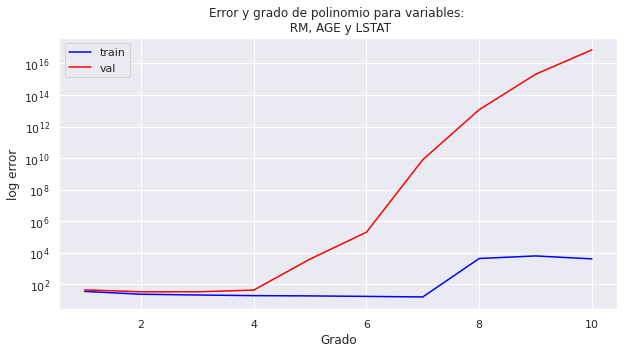

In [ ]:
lista_errores=np.array(lista_errores)
plt.figure(figsize=(10,5))
plt.plot(lista_errores[:,0], lista_errores[:,1], color="blue", label="train")
plt.plot(lista_errores[:,0], lista_errores[:,2], color="red", label="val")
plt.yscale('log')
plt.xlabel("Grado")
plt.ylabel("log error")
plt.title('Error y grado de polinomio para variables: \n RM, AGE y LSTAT')
plt.legend()
plt.show()

### 5.3 Interpretación y comparación de resultados ¿Se obtuvieron mejores modelos? ¿Porqué?:
Rta//:
  - Notamos que para los primeros grados de polinomios el error de entrenamiento es menor que cuando utilizamos una sola variable. En principio, ocurre lo mismo con error de prueba. Es llamativo con grados mayores, al presentarse sobreajuste observar como se dispara  la magnitud del error de prueba. 
  - Elegimos la solución obtenida con grado 3, como una propuesta de buena perfomance.
  - El modelo obentido nos ofrece ún error de entrenamiento y prueba menor a los previos estudiados. 
  - Esto se debe al aumento en la cantidad de caracteristicas que participan del entrenamiento. 

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature
Rta//:
Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.



In [ ]:
# Tomamos todas las features
X_train_full = X_train
X_test_full = X_test
X_train_full.shape, X_test_full.shape

((404, 13), (102, 13))

In [ ]:
# Analizamos en forma iterativa los distinto modelos  con un grado de polinomio creciente
# en el rango 1..10

lista_errores=[]
for degree in range (1,7):
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
    model = make_pipeline(pf, lr)
    model.fit(X_train_full, y_train);
    
    # Predicción y evaluación.
    y_train_pred = model.predict(X_train_full)
    y_test_pred = model.predict(X_test_full)
    
    # Calculo de errores
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_test, y_test_pred)
    print(f"º Pol={degree} -->", f'Train_err={round(train_error,2)}',
          f'Test_err={round(val_error,2)}')
    lista_errores.append([degree, train_error,val_error ])

º Pol=1 --> Train_err=19.33 Test_err=33.45
º Pol=2 --> Train_err=4.34 Test_err=31.28
º Pol=3 --> Train_err=0.0 Test_err=976575.88
º Pol=4 --> Train_err=0.0 Test_err=950756.91
º Pol=5 --> Train_err=0.0 Test_err=195453.64
º Pol=6 --> Train_err=0.0 Test_err=200691.24


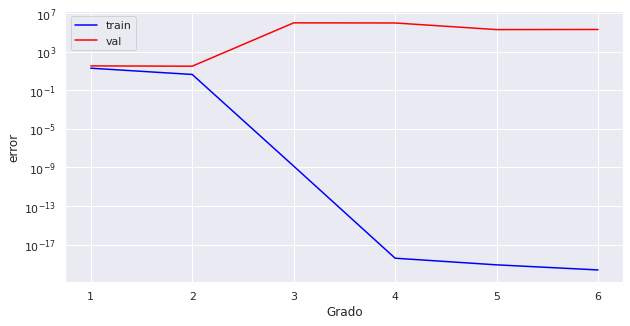

In [ ]:
lista_errores=np.array(lista_errores)
plt.figure(figsize=(10,5))
plt.plot(lista_errores[:,0], lista_errores[:,1], color="blue", label="train")
plt.plot(lista_errores[:,0], lista_errores[:,2], color="red", label="val")
plt.legend()
plt.yscale('log')
plt.xlabel("Grado")
plt.ylabel("error")
plt.show()

 # Conclusiones:
 - Notamos que para los primeros grados de polinomios el error de entrenamiento y prueba es pequeño, grado 1 y 2.
 - Destacamos que con grados mayores a 2 el error de entrenamiento se hace cero evidenciandose un sobreajuste al crecer significativamente la magnitud del error de prueba. 
 - Elegimos la solución obtenida con grado 2, como una propuesta de buena perfomance. La misma  ofrece ún error de entrenamiento y prueba menor a los previos estudiados. Esto se debe a que se utlizaron el **Total de caracteristicas disponibles** para entrenar el modelo.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
Rta//:

In [ ]:
from sklearn.linear_model import Ridge

feature="AGE"
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == feature)

X_train_ridge = X_train[:, selector]
X_test_ridge = X_test[:, selector]
X_train_ridge.shape, X_test_ridge.shape


((404, 1), (102, 1))

7.1 Planteamos el estudio de un polinomio de grado 10, en un rango amplio de alpha.

º Pol=10 --> Alpha=10.0 Train_err=67.45 Test_err=88.07
º Pol=10 --> Alpha=17.0 Train_err=67.45 Test_err=88.07
º Pol=10 --> Alpha=28.0 Train_err=67.45 Test_err=88.07
º Pol=10 --> Alpha=46.0 Train_err=67.45 Test_err=88.08
º Pol=10 --> Alpha=77.0 Train_err=67.45 Test_err=88.09
º Pol=10 --> Alpha=129.0 Train_err=67.45 Test_err=88.11
º Pol=10 --> Alpha=215.0 Train_err=67.45 Test_err=88.14
º Pol=10 --> Alpha=359.0 Train_err=67.45 Test_err=88.16
º Pol=10 --> Alpha=599.0 Train_err=67.45 Test_err=88.19
º Pol=10 --> Alpha=1000.0 Train_err=67.46 Test_err=88.22


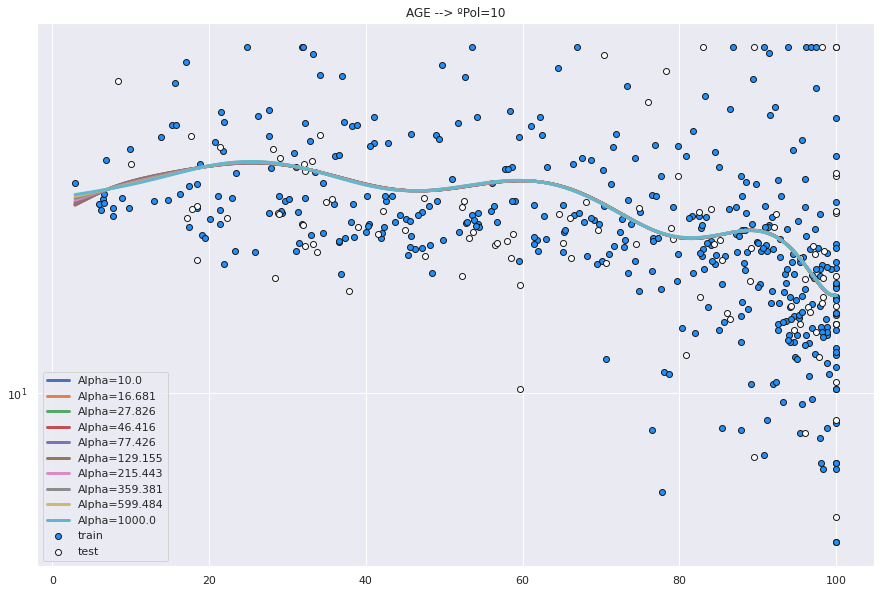

In [ ]:
degree = 10
lista_parameters=[]
alphas = np.logspace(1, 3, 10)

plt.figure(figsize=(15,10))

plt.scatter(X_train_ridge, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_ridge, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(f"{feature} --> ºPol={degree}")
x_start = min(np.min(X_train_ridge), np.min(X_test_ridge))
x_end = max(np.max(X_train_ridge), np.max(X_test_ridge))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)


for alpha_test in alphas:
    pf = PolynomialFeatures(degree);
    lr = Ridge();
    lr.set_params(alpha=alpha_test);
    #lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr);
    model.fit(X_train_ridge, y_train);

    # Predicción y evaluación.
    y_train_pred_ridge = model.predict(X_train_ridge);
    y_test_pred_ridge = model.predict(X_test_ridge);


    plt.plot(x, model.predict(x), label=f"Alpha={round(alpha_test,3)}", linewidth=3)

    # Calculo de errores
    train_error = mean_squared_error(y_train, y_train_pred_ridge);
    val_error = mean_squared_error(y_test, y_test_pred_ridge);
    print(f"º Pol={degree} -->",  f"Alpha={round(alpha_test,0)}", f'Train_err={round(train_error,2)}',
          f'Test_err={round(val_error,2)}')
    lr.coef_[0]=lr.intercept_
    lista_parameters.append(np.concatenate(([degree, alpha_test,train_error,val_error], lr.coef_), axis=None))

plt.legend()
plt.yscale('log')
plt.show()


### 7.2 Planteamos el estudio de un polinomio de grado 15, buscando un rango de alpha procedente

º Pol=15 --> Alpha=100000000.0 Train_err=3647.34 Test_err=3953.05
º Pol=15 --> Alpha=166810054.0 Train_err=3735.36 Test_err=4045.07
º Pol=15 --> Alpha=278255940.0 Train_err=3716.67 Test_err=4018.9
º Pol=15 --> Alpha=464158883.0 Train_err=67.29 Test_err=89.19
º Pol=15 --> Alpha=774263683.0 Train_err=3369.97 Test_err=3623.08
º Pol=15 --> Alpha=1291549665.0 Train_err=67.3 Test_err=89.2
º Pol=15 --> Alpha=2154434690.0 Train_err=67.3 Test_err=89.29
º Pol=15 --> Alpha=3593813664.0 Train_err=2506.92 Test_err=2655.7
º Pol=15 --> Alpha=5994842503.0 Train_err=2285.51 Test_err=2410.02
º Pol=15 --> Alpha=10000000000.0 Train_err=2122.28 Test_err=2229.73


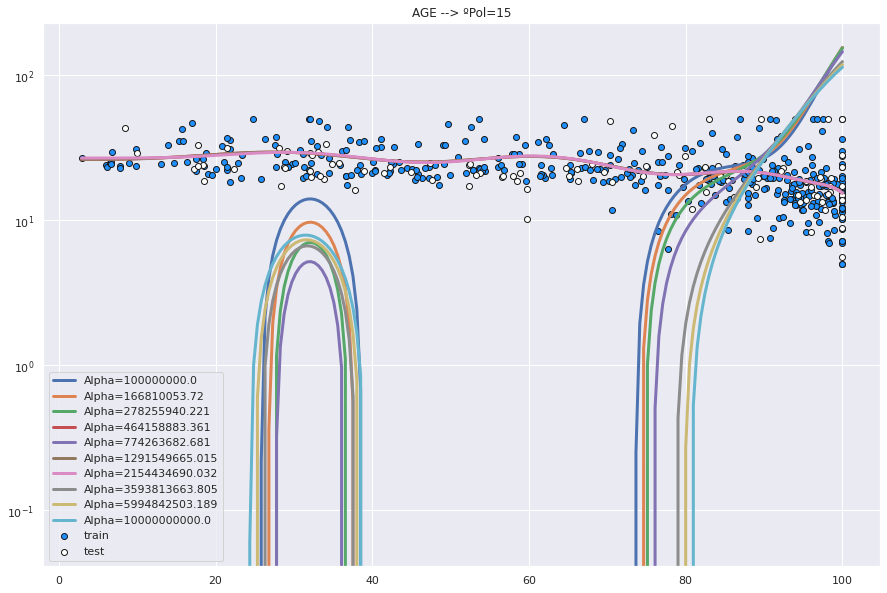

In [ ]:
degree = 15
lista_parameters=[]
alphas = np.logspace(8, 10, 10)

plt.figure(figsize=(15,10))

plt.scatter(X_train_ridge, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_ridge, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(f"{feature} --> ºPol={degree}")
x_start = min(np.min(X_train_ridge), np.min(X_test_ridge))
x_end = max(np.max(X_train_ridge), np.max(X_test_ridge))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)


for alpha_test in alphas:
    pf = PolynomialFeatures(degree);
    lr = Ridge();
    lr.set_params(alpha=alpha_test);
    #lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr);
    model.fit(X_train_ridge, y_train);

    # Predicción y evaluación.
    y_train_pred_ridge = model.predict(X_train_ridge);
    y_test_pred_ridge = model.predict(X_test_ridge);


    plt.plot(x, model.predict(x), label=f"Alpha={round(alpha_test,3)}", linewidth=3)

    # Calculo de errores
    train_error = mean_squared_error(y_train, y_train_pred_ridge);
    val_error = mean_squared_error(y_test, y_test_pred_ridge);
    print(f"º Pol={degree} -->",  f"Alpha={round(alpha_test,0)}", f'Train_err={round(train_error,2)}',
          f'Test_err={round(val_error,2)}')
    lr.coef_[0]=lr.intercept_
    lista_parameters.append(np.concatenate(([degree, alpha_test,train_error,val_error], lr.coef_), axis=None))

plt.legend()
plt.yscale('log')
plt.show()

# 7.3 Consideraciones: 
- Punto 7.1 Para un polinomio de grado diez se observa que en el rango de alpha aplicado para la regresion Ridge el error de predicción y prueba mejora siginificativamente en comparación a la regresión polinomial simple.
- Punto 7.2 Aún en el caso de proponer un polinomio de grado quince, existen valores de alpha que ofrecen errores de predicción y prueba con mejor desempeño que el logrado con la regresión polinomial simple.